# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [14]:
# Impor library yang diperlukan hanya untuk Random Forest dan Decision Tree
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score,
                            precision_score, recall_score, f1_score,
                            classification_report)

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [15]:
# Memuat dataset dari file CSV
file_path = '/content/hasil_clustering_reksi.csv'
df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama
print("5 Baris Pertama Dataset:")
display(df.head())

# Menampilkan informasi dasar dataset
print("\nInformasi Dataset:")
df.info()

5 Baris Pertama Dataset:


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Month,Cluster
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,2023-04,0
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,2023-06,0
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,2023-07,1
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,2023-05,0
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,2023-10,1



Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  Acco

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [16]:
# Definisikan fitur yang akan digunakan
features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance',
            'TransactionType', 'Location', 'Channel', 'CustomerOccupation']
X = df[features]
y = df['Cluster'].astype(int)

# Membagi dataset menjadi 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Label Encoding untuk kolom kategorikal
categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']
le = LabelEncoder()

# Terapkan Label Encoding pada setiap kolom kategorikal
for col in categorical_cols:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

# Normalisasi fitur menggunakan StandardScaler setelah split
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Tampilkan ukuran dataset setelah split
print(f"\nUkuran Dataset setelah Split:")
print(f"Training Set: {X_train_scaled.shape}, Testing Set: {X_test_scaled.shape}")


Ukuran Dataset setelah Split:
Training Set: (2009, 9), Testing Set: (503, 9)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [17]:
# Model 1: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Model 2: Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)


DecisionTreeClassifier(random_state=42)

Kode ini menggunakan dua algoritma klasifikasi, yaitu **Random Forest** dan **Decision Tree**. Random Forest bekerja dengan membangun beberapa pohon keputusan untuk meningkatkan akurasi dan mengurangi overfitting. Sementara itu, Decision Tree digunakan karena kesederhanaannya dan kemudahan interpretasi, yang membantu dalam analisis awal. Kedua model ini kemudia akan dilatih dengan data latih yang tadi telah saya bagi antara test dan train.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.


=== Model Performance Comparison ===
Random Forest Accuracy: 0.9742 | F1-score: 0.9740
Decision Tree Accuracy: 0.9761 | F1-score: 0.9761


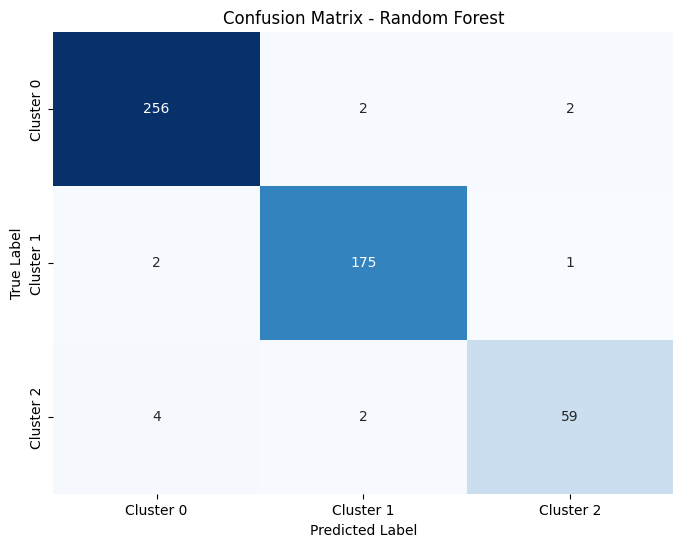

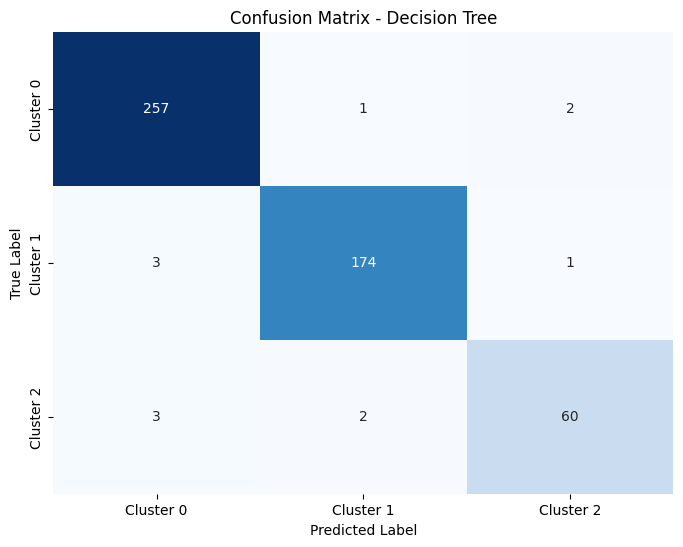

In [18]:
# Prediksi dengan Random Forest
y_pred_rf = rf_model.predict(X_test_scaled)

# Prediksi dengan Decision Tree
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluasi Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Evaluasi Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Perbandingan hasil
print("\n=== Model Performance Comparison ===")
print(f"Random Forest Accuracy: {accuracy_rf:.4f} | F1-score: {f1_rf:.4f}")
print(f"Decision Tree Accuracy: {accuracy_dt:.4f} | F1-score: {f1_dt:.4f}")

# Fungsi untuk memplot confusion matrix sebagai heatmap
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))  # Mengatur ukuran gambar
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'],
                yticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2'])  # Label untuk 3 cluster
    plt.title(title)  # Judul plot
    plt.xlabel('Predicted Label')  # Label sumbu x
    plt.ylabel('True Label')  # Label sumbu y
    plt.show()

# Memplot confusion matrix untuk Random Forest
plot_confusion_matrix(cm_rf, 'Confusion Matrix - Random Forest')

# Memplot confusion matrix untuk Decision Tree
plot_confusion_matrix(cm_dt, 'Confusion Matrix - Decision Tree')

## Perbandingan Performa Algoritma Klasifikasi

- **Akurasi dan F1-Score**:
  - **Random Forest**: Akurasi 97,42%, F1-score 0,9740.
  - **Decision Tree**: Akurasi 97,61%, F1-score 0,9761.
  - **Catatan**: Decision Tree lebih unggul dengan selisih akurasi 0,19% dan F1-score 0,0021.

- **Confusion Matrix**:
  - **Random Forest**: Total 13 kesalahan prediksi.
    - Cluster 0: 256 benar, 4 salah (2 ke Cluster 1, 2 ke Cluster 2).
    - Cluster 1: 175 benar, 3 salah (2 ke Cluster 0, 1 ke Cluster 2).
    - Cluster 2: 59 benar, 6 salah (4 ke Cluster 0, 2 ke Cluster 1).
  - **Decision Tree**: Total 12 kesalahan prediksi.
    - Cluster 0: 257 benar, 3 salah (1 ke Cluster 1, 2 ke Cluster 2).
    - Cluster 1: 174 benar, 4 salah (3 ke Cluster 0, 1 ke Cluster 2).
    - Cluster 2: 60 benar, 5 salah (3 ke Cluster 0, 2 ke Cluster 1).

- **Kesimpulan**:
  - Decision Tree lebih akurat dan konsisten dengan kesalahan lebih sedikit.
  - Random Forest menawarkan stabilitas lebih baik untuk data kompleks.
  - Pemilihan model bergantung pada prioritas: interpretabilitas (Decision Tree) atau stabilitas (Random Forest).

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [19]:
# Definisikan parameter grid untuk Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Gunakan GridSearchCV untuk mencari hyperparameter terbaik
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid,
                              cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
rf_grid_search.fit(X_train_scaled, y_train)

# Tampilkan hyperparameter terbaik untuk Random Forest
print("Best parameters for Random Forest:", rf_grid_search.best_params_)
print("Best cross-validation accuracy for Random Forest:", rf_grid_search.best_score_)



Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation accuracy for Random Forest: 0.9731194402054564


In [20]:
# Definisikan parameter grid untuk Decision Tree
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Gunakan GridSearchCV untuk mencari hyperparameter terbaik
dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid,
                              cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
dt_grid_search.fit(X_train_scaled, y_train)

# Tampilkan hyperparameter terbaik untuk Decision Tree
print("Best parameters for Decision Tree:", dt_grid_search.best_params_)
print("Best cross-validation accuracy for Decision Tree:", dt_grid_search.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best cross-validation accuracy for Decision Tree: 0.9701281621816106


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [21]:
# Gunakan model dengan hyperparameter terbaik
best_rf_model = rf_grid_search.best_estimator_
best_dt_model = dt_grid_search.best_estimator_

# Prediksi dengan model yang sudah di-tuning
y_pred_rf_tuned = best_rf_model.predict(X_test_scaled)
y_pred_dt_tuned = best_dt_model.predict(X_test_scaled)

# Evaluasi Random Forest setelah tuning
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
f1_rf_tuned = f1_score(y_test, y_pred_rf_tuned, average='weighted')
cm_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)

# Evaluasi Decision Tree setelah tuning
accuracy_dt_tuned = accuracy_score(y_test, y_pred_dt_tuned)
f1_dt_tuned = f1_score(y_test, y_pred_dt_tuned, average='weighted')
cm_dt_tuned = confusion_matrix(y_test, y_pred_dt_tuned)

# Tampilkan perbandingan performa setelah tuning
print("\n=== Model Performance Comparison After Tuning ===")
print(f"Random Forest (Tuned) - Accuracy: {accuracy_rf_tuned:.4f}, F1-score: {f1_rf_tuned:.4f}")
print(f"Decision Tree (Tuned) - Accuracy: {accuracy_dt_tuned:.4f}, F1-score: {f1_dt_tuned:.4f}")


=== Model Performance Comparison After Tuning ===
Random Forest (Tuned) - Accuracy: 0.9742, F1-score: 0.9741
Decision Tree (Tuned) - Accuracy: 0.9722, F1-score: 0.9719


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

### Analisis Hasil Evaluasi

#### 1. Perbandingan Performa Sebelum dan Setelah Tuning
- **Random Forest**:
  - Sebelum tuning: Akurasi 97,42%, F1-score 0,9740.
  - Setelah tuning: Akurasi 97,42%, F1-score 0,9741.
  - **Peningkatan**: Tidak ada peningkatan akurasi (0,00%), tetapi F1-score naik sedikit (0,0001). Tuning tidak memberikan dampak signifikan pada performa Random Forest, yang menunjukkan bahwa model awal sudah cukup optimal.
- **Decision Tree**:
  - Sebelum tuning: Akurasi 97,61%, F1-score 0,9761.
  - Setelah tuning: Akurasi 97,22%, F1-score 0,9719.
  - **Penurunan**: Akurasi turun 0,39% dan F1-score turun 0,0042. Tuning justru menurunkan performa Decision Tree, kemungkinan karena hyperparameter yang dipilih membatasi kemampuan model untuk menangkap pola data.

#### 2. Identifikasi Kelemahan Model
Berdasarkan *confusion matrix* sebelum tuning:
- **Random Forest**:
  - Cluster 0: 256 benar, 4 salah (2 ke Cluster 1, 2 ke Cluster 2).
  - Cluster 1: 175 benar, 3 salah (2 ke Cluster 0, 1 ke Cluster 2).
  - Cluster 2: 59 benar, 6 salah (4 ke Cluster 0, 2 ke Cluster 1).
  - **Kelemahan**: Cluster 2 memiliki kesalahan prediksi tertinggi (6 dari 65), menunjukkan *recall* yang lebih rendah untuk kelas ini. Model cenderung salah mengklasifikasikan Cluster 2 sebagai Cluster 0.
- **Decision Tree**:
  - Cluster 0: 257 benar, 3 salah (1 ke Cluster 1, 2 ke Cluster 2).
  - Cluster 1: 174 benar, 4 salah (3 ke Cluster 0, 1 ke Cluster 2).
  - Cluster 2: 60 benar, 5 salah (3 ke Cluster 0, 2 ke Cluster 1).
  - **Kelemahan**: Serupa dengan Random Forest, Cluster 2 memiliki *recall* yang lebih rendah (5 dari 65 salah prediksi). Namun, Decision Tree sedikit lebih baik dalam memprediksi Cluster 2 dibandingkan Random Forest.

Berdasarkan *classification report* , kita dapat melihat *precision* dan *recall* per kelas untuk mengkonfirmasi kelemahan ini.

#### 3. Overfitting atau Underfitting
- **Random Forest**:
  - Sebelum tuning, akurasi pada data uji (97,42%) sangat tinggi dan stabil, menunjukkan tidak ada tanda overfitting atau underfitting yang signifikan.
  - Setelah tuning, performa hampir tidak berubah, menegaskan bahwa model awal sudah optimal untuk dataset ini.
- **Decision Tree**:
  - Sebelum tuning, akurasi tinggi (97,61%) menunjukkan model cukup baik, tetapi Decision Tree cenderung rentan terhadap overfitting karena sifatnya yang membangun pohon tanpa batasan ketat.
  - Setelah tuning, performa justru turun (97,22%), kemungkinan karena hyperparameter seperti `max_depth` atau `min_samples_leaf` yang dipilih terlalu ketat, menyebabkan underfitting (model menjadi terlalu sederhana untuk menangkap pola data).

#### 4. Rekomendasi Tindakan Lanjutan
- **Penanganan Cluster 2**: Cluster 2 memiliki *recall* terendah pada kedua model. Untuk meningkatkan performa:
  - Mengumpulkan data tambahan untuk Cluster 2 agar model dapat belajar lebih baik.
  - Menerapkan teknik seperti oversampling (misalnya SMOTE) untuk menyeimbangkan distribusi kelas.
- **Optimalisasi Tuning**:
  - Untuk Decision Tree, coba rentang hyperparameter yang lebih luas pada `GridSearchCV`, seperti meningkatkan `max_depth` atau mengurangi batasan `min_samples_split`.
  - Untuk Random Forest, karena performa sudah optimal, tuning lebih lanjut mungkin tidak diperlukan.
- **Eksperimen dengan Algoritma Lain**: Jika performa masih belum memuaskan, coba algoritma lain seperti XGBoost atau SVM, yang mungkin lebih baik dalam menangani ketidakseimbangan kelas.